<a href="https://colab.research.google.com/github/Found-Bugs/Pembelajaran-Mesin/blob/Clustering/Praktikum_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
pip install minisom

In [109]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [110]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

In [111]:
# Normalisasi data
data = data / data.max(axis=0)

In [112]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

In [113]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

In [114]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

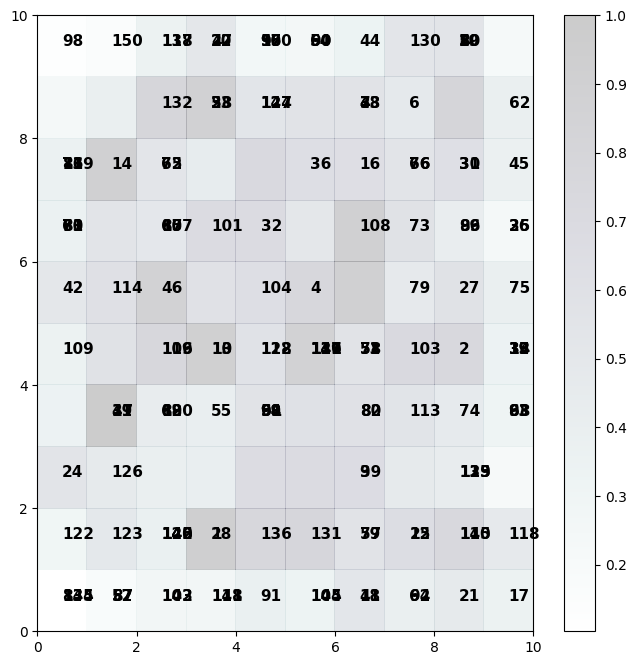

In [115]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()